## Тема
Введение в нейронные сети
## Цель
Знакомство с основными понятиями нейронных сетей.
## Пример
Вариант 1

## Задание
1.Выучить основные понятия неуронных сетей.

2.Графически отобразить результаты экспериментальной зависимости выходной величины Y от входной величины X

Для работы с массивами мы будем использовать библиотеку _NumPy_.

_NumPy_ — это библиотека с открытым исходным кодом для языка программирования Python. Она предоставляет реализации вычислительных алгоритмов (в виде функций и операторов), оптимизированные для работы с многомерными массивами. В результате любой алгоритм, который может быть выражен в виде последовательности операций над массивами (матрицами) и реализованный с использованием NumPy, работает так же быстро, как эквивалентный код, выполняемый в MATLAB.

Возможности:
- поддержка многомерных массивов (включая матрицы);
- поддержка высокоуровневых математических функций, предназначенных для работы с многомерными массивами.

In [1]:
import numpy as np

# Массив со значениями в диапазоне от 1 до 9
x = np.arange(1, 10)
print(x)

y = np.array([3.6, 4.4, 5.8, 6.2, 7.4, 8, 9.2, 10.4, 11.8])
print(y)

[1 2 3 4 5 6 7 8 9]
[  3.6   4.4   5.8   6.2   7.4   8.    9.2  10.4  11.8]


Для построения графиков используется _Matplotlib API_. Установить ее можно с помощью пакетного менеджера pip:

    pip3 install matplotlib

В данном случае мы используем метод _plot(x, y, тип маркера)_.

Больше информации о данной библиотеке можно узнать тут - https://matplotlib.org/contents.html

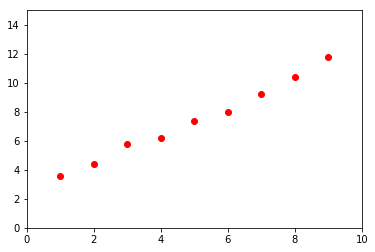

In [2]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'ro')
plt.axis([0, 10, 0, 15])
plt.show()

3.Найти аналитическое описание данной зависимости (линейное), используя метод наименьших квадратов:

\begin{eqnarray}
y = mx + c
\end{eqnarray}

    Подсказка! Используя метод наименьших квадратов, можно записать:

\begin{eqnarray}
E = \sum [y_i - (mx_i + c_i)]^2
\end{eqnarray}

    Рассмотрим частные производные, проанализируем зависимость общей ошибки от изменения _m_ и _c_:

\begin{eqnarray}
\frac{\delta E}{\delta m} = -2 \sum x_i[y_i - (mx_i + c_i)]\frac{\delta E}{\delta c} = -2 \sum [y_i - (mx_i + c_i)]
\end{eqnarray}

    Приравнивая к _0_ и решая соответствующее уравнение, получаем:

\begin{eqnarray}
m = \frac{n \sum x_i y_i - \sum x_i \sum y_i}{n \sum x_i^2 - (\sum x_i)^2}, c = \frac{\sum y_i - m \sum x_i}{n}
\end{eqnarray}

    Метод наименьших квадратов дает эффективный способ нахождения прямой, которая соответствует существующему набору данных.

Sum of Xi:	 45
Sum of Yi:	 66.8
Sum of Xi^2:	 285
Sum of Xi * Yi:	 393.4
m:		 0.99
c:		 2.47222222222
Y:		 [  3.46222222   4.45222222   5.44222222   6.43222222   7.42222222
   8.41222222   9.40222222  10.39222222  11.38222222]


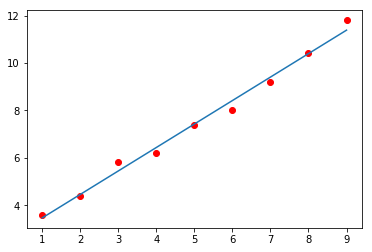

In [4]:
import math

n = len(x)

sum_x = np.sum(x)
print('Sum of Xi:\t', sum_x)
sum_y = np.sum(y)
print('Sum of Yi:\t', sum_y)
sum_sqr_x = x.dot(x)
print('Sum of Xi^2:\t', sum_sqr_x)
sum_xy = x.dot(y)
print('Sum of Xi * Yi:\t', sum_xy)

m = (n * sum_xy - sum_x * sum_y) / (n * sum_sqr_x - sum_x**2)
print('m:\t\t', m)

c = (sum_y - m * sum_x) / n
print('c:\t\t', c)

y_approx = m * x + c
print('Y:\t\t', y_approx)

plt.plot(x, y, 'ro')
plt.plot(x, y_approx)
plt.show()

4.Найти аналитическое описание этой зависимости (линейной), используя нейронные сети.
    
    Алгоритм:
    
    1. В начале весовые коэфициенты устанавливаются равными случайным значениям (небольшим)
    2. Разница между ожидаемым t и полученным значением y даст ошибку:
        
\begin{eqnarray}
\delta = t - y
\end{eqnarray}
        
        Ее можно использовать для корректирования весов.
    3. Правилом проекции ошибок есть дельта правило (правило Видроу-Хоффа), в соответствии с которым коррекция вычисляется по формуле:
    
\begin{eqnarray}
\Delta W = \eta \delta x
\end{eqnarray}
       
        Новый весовой коэффициент вычисляется по формуле:
    4. В процессе обучения на вход сети подаются пример за примером, и корректируются веса до тех пор, пока для всех примеров ошибка не станет меньше некоторого достаточно малого значения.
        
\begin{eqnarray}
W = W + \Delta W
\end{eqnarray}
        
        После обучения, НС можно протестировать на контрольных данных и оценить их работу (сравнить с методом наименьших квадратов).

5.Оценить среднюю ошибку апроксимации.

In [5]:
error_sqr = y - y_approx
error_sqr_median = np.sum(error_sqr) / len(error_sqr)
print('Ошибка аппроксимации в случае метода наименьших квадратов:\n%s\nСреднее значение:\n%s' 
      % (error_sqr, error_sqr_median))


Ошибка аппроксимации в случае метода наименьших квадратов:
[ 0.13777778 -0.05222222  0.35777778 -0.23222222 -0.02222222 -0.41222222
 -0.20222222  0.00777778  0.41777778]
Среднее значение:
4.93432455389e-16
